# Data Science w/Python

# HW5

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code would not work on different data</li>
<li>Your code is unnecessarily slow (you use a for loop, or you use DataFrame.apply unnecessarily, etc)
<li>You answer is composed of more than one output, unless explicitly permitted
</ul>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Set Description

## USA.gov Data from Bitly

In 2011, URL shortening service Bitly *Bitly.com* partnered with the US goverment website *USA.gov* to provide a feed of anonymous data gathered from users who shorten links ending with *.gov* or *.mil*.  This service is shut down at 2017. 

In this database, each line contains a common form of web data known as **JSON**, which stands for *JavaScript Object Notation* . Python has both built-in and 3rd party libraries for converting a JSON string into a Python dictionary object. Then we can use *pd.DataFrame* convert dictionary object into Dataframe for our analysis.

each line has a number of identifying attributes.

In [18]: records[0] <br>
Out[18]: <br>
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko)
Chrome/17.0.963.78 Safari/535.11', <br>
 'al': 'en-US,en;q=0.8', <br>
 'c': 'US',<br>
 'cy': 'Danvers',<br>
 'g': 'A6qOVH',<br>
 'gr': 'MA',<br>
 'h': 'wfLQtf',<br>
 'hc': 1331822918,<br>
 'hh': '1.usa.gov',<br>
 'l': 'orofrog',<br>
 'll': [42.576698, -70.954903],<br>
 'nk': 1,<br>
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',<br>
 't': 1331923247,<br>
 'tz': 'America/New_York',<br>
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}<br>
 

In [3]:
import json
file_name = 'bitly_usagov_example.txt'
records = [json.loads(line) for line in open(file_name)]

In [4]:
records[0:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

* **a**: info. about browser, device or application used to perform the URL shortening. 
* **c**: country
* **cy**: city
* **gr**: state
* **ll**: longitude and latitude
* **tz**: TimeZone
* **u**: original URL being shorted

## Convert this dictionary *records* into DataFrame. (find out which method to use yourself)

In [5]:
df = pd.DataFrame.from_dict(records)

In [6]:
df

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [7]:
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


### Q1.1,   How many records are in the Dataframe? (In Camino, pick the right number)

In [8]:
len(df)

3560

### Q1.2,   In column city('cy'), how many records are Nan? (In Camino, pick the right number)

In [9]:
len(df[df.cy.isna()])

641

### Q1.3,   Exclude Nan, how many different countries this dataset include?  (In Camino, pick the right number)

In [10]:
df[df.c.isna()]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
7,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,"bg,en-us;q=0.7,en;q=0.3",1.usa.gov,http://www.facebook.com/,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,"en-US, en",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,None,0.0,,NaN,zCaLwp,zUtuOu,alelex88,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://t.co/o1Pd0WeV,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331923e+09,NaN
28,Mozilla/5.0 (iPad; CPU OS 5_0_1 like Mac OS X)...,None,0.0,,NaN,vNJS4H,u0uD9q,o_4us71ccioa,en-us,1.usa.gov,direct,https://www.nysdot.gov/rexdesign/design/commun...,1.331923e+09,1.319564e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331927e+09,NaN
3531,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,en-US,1.usa.gov,direct,http://www.nasa.gov/mission_pages/nustar/main/...,1.331927e+09,1.331923e+09,NaN,NaN,NaN,NaN
3536,Mozilla/5.0 (BlackBerry; U; BlackBerry 9800; e...,None,0.0,,NaN,xIcyim,yG1TTf,nasatwitter,"en-US,en;q=0.5",go.nasa.gov,http://t.co/g1VKE8zS,http://www.nasa.gov/mission_pages/hurricanes/a...,1.331927e+09,1.331728e+09,NaN,NaN,NaN,NaN
3543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.331927e+09,NaN


In [11]:
df2 = df.copy()

In [12]:
df2.c.fillna(value = 'None', inplace = True)

In [13]:
df2.c.isna().any()

False

In [14]:
df2.c.unique()

array(['US', 'BR', 'PL', 'None', 'HK', 'IT', 'ES', 'MY', 'CY', 'GB', 'MT',
       'PT', 'FR', 'DK', 'MX', 'IE', 'BE', 'CA', 'NL', 'CZ', 'SE', 'TH',
       'DE', 'HU', 'JP', 'AT', 'IL', 'PK', 'CO', 'IN', 'MK', 'LB', 'AU',
       'CL', 'SK', 'EG', 'TR', 'RU', 'BG', 'SI', 'FI', 'RO', 'CH', 'PR',
       'GR', 'LV', 'AR', 'AE', 'NO', 'PH', 'VE', 'SA', 'UY', 'KR', 'UA',
       'RS', 'CR', 'PE', 'ID', 'LT', 'NI', 'ZM', 'EC', 'CN', 'JO', 'ZA',
       'KN', 'NZ', 'DO', 'BO', 'MA', 'HN'], dtype=object)

In [15]:
df2.c.nunique()

72

In [16]:
df.c.unique()

array(['US', 'BR', 'PL', None, nan, 'HK', 'IT', 'ES', 'MY', 'CY', 'GB',
       'MT', 'PT', 'FR', 'DK', 'MX', 'IE', 'BE', 'CA', 'NL', 'CZ', 'SE',
       'TH', 'DE', 'HU', 'JP', 'AT', 'IL', 'PK', 'CO', 'IN', 'MK', 'LB',
       'AU', 'CL', 'SK', 'EG', 'TR', 'RU', 'BG', 'SI', 'FI', 'RO', 'CH',
       'PR', 'GR', 'LV', 'AR', 'AE', 'NO', 'PH', 'VE', 'SA', 'UY', 'KR',
       'UA', 'RS', 'CR', 'PE', 'ID', 'LT', 'NI', 'ZM', 'EC', 'CN', 'JO',
       'ZA', 'KN', 'NZ', 'DO', 'BO', 'MA', 'HN'], dtype=object)

In [17]:
#this is the answer
df.c.nunique()

71

### Q1.4, Outside of US, what's the top 5 cities use this Bitly service? (In Camino, choose the  city name with the most usage)

In [18]:
df2[df2.c != 'US'].groupby('cy')['cy'].count().nlargest(5)

cy
Nogata    29
London    16
Madrid    13
Mexico    12
SPaulo    11
Name: cy, dtype: int64

## Q2

### Q2.1, How many records are from Russia?  (In Camino, pick the right number)

In [19]:
df2[df2.c == 'RU']

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
498,Opera/9.80 (Windows NT 5.1; U; ru) Presto/2.9....,RU,0.0,Asia/Novosibirsk,53,xVZg4P,wqUkTo,nasatwitter,"ru-RU,ru;q=0.9,en;q=0.8",go.nasa.gov,direct,http://www.nasa.gov/multimedia/imagegallery/im...,1.331924e+09,1.331908e+09,Novosibirsk,"[55.0411, 82.934402]",NaN,NaN
555,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,RU,0.0,Europe/Moscow,48,wcndER,zkpJBR,bnjacobs,"en-GB,en-US;q=0.8,en;q=0.6",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331924e+09,1.331923e+09,Moscow,"[55.752201, 37.615601]",NaN,NaN
764,Opera/9.80 (Windows NT 5.1; U; ru) Presto/2.10...,RU,0.0,Europe/Moscow,66,Ch5wd,FOjduY,tweetdeckapi,"ru-RU,ru;q=0.9,en;q=0.8",1.usa.gov,direct,https://www.cia.gov/library/publications/world...,1.331924e+09,1.331924e+09,Saint Petersburg,"[59.894402, 30.2642]",NaN,NaN
777,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,RU,0.0,Europe/Moscow,48,16e1jo,dJY67O,tmartin,ru,prks.org,http://yandex.ru/yandsearch?text=prks.org&lr=213,http://www.nps.gov/getaways/,1.331924e+09,1.301482e+09,Moscow,"[55.752201, 37.615601]",NaN,NaN
1137,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.7...,RU,0.0,Asia/Yekaterinburg,33,wcndER,zkpJBR,bnjacobs,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/,http://www.nasa.gov/mission_pages/nustar/main/...,1.331924e+09,1.331923e+09,Kirov,"[58.596901, 49.658298]",NaN,NaN
1239,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,RU,0.0,Europe/Moscow,48,lqEP3f,jDuTCu,twitterfeed,ru,1.usa.gov,http://yandex.ru/yandsearch?text=1.usa.gov&lr=213,http://www.state.gov/r/pa/ei/bgn?utm_source=tw...,1.331924e+09,1.306397e+09,Moscow,"[55.752201, 37.615601]",NaN,NaN
2637,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,RU,1.0,Europe/Moscow,48,xVZg4P,wqUkTo,nasatwitter,"ru-RU,ru;q=0.8,en-US;q=0.6,en;q=0.4",go.nasa.gov,http://t.co/UKGBxj29,http://www.nasa.gov/multimedia/imagegallery/im...,1.331926e+09,1.331908e+09,Moscow,"[55.752201, 37.615601]",NaN,NaN
2998,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.2...,RU,0.0,Europe/Moscow,48,wcndER,zkpJBR,bnjacobs,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Moscow,"[55.752201, 37.615601]",NaN,NaN
3033,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,RU,0.0,Europe/Volgograd,38,wcndER,zkpJBR,bnjacobs,"ru-RU,ru;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331926e+09,1.331923e+09,Krasnodar,"[45.032799, 38.976898]",NaN,NaN
3117,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_4_1...,RU,1.0,Europe/Moscow,66,y4NeMN,FOehY1,twitterfeed,ru,1.usa.gov,http://www.facebook.com/home.php,http://www.nasa.gov/mission_pages/station/mult...,1.331926e+09,1.331921e+09,Saint Petersburg,"[59.894402, 30.2642]",NaN,NaN


In [20]:
len(df2[df2.c == 'RU'])

13

### Q2.2, In those records, which city has the highest usage count ?  (In Camino, pick the right city name)

In [21]:
df2[df2.c == 'RU'].groupby('cy')['cy'].count().nlargest(1)

cy
Moscow    8
Name: cy, dtype: int64

### Q2.3, In those records, how many access to cia.gov  (In Camino, pick the right number) 

In [22]:
df2[df2.c == 'RU'].u.str.contains('cia').sum()

2

## Q3 We are interested in time zones in this data set (the **tz** field). 

### Q3.1, Let's clean the tz field. If it is empty, filled with 'Unknown'. If it is NaN, filled with 'Missing'.  After cleaning, how many tz field are in 'Missing' state and how many are in 'Unknown' state?  (In Camino, fill in these two numbers in the format of 'Missing'/'Unknown'. Don't leave any space in the answer.)

In [23]:
#number of missing values
(df2.tz == '').sum()

521

In [24]:
df2.tz.replace(to_replace='', value='Unknown', inplace = True)

In [25]:
(df2.tz == '').any()

False

In [26]:
(df2.tz == '').sum()

0

In [27]:
#number of NaN values
df2.tz.isna().sum()

120

In [28]:
df2.tz.replace(to_replace= np.nan, value='Missing', inplace = True)

In [29]:
df2.tz.isna().sum()

0

In [30]:
(df2.tz == 'Missing').sum()

120

In [31]:
print('120/521')

120/521


### Q3.2, What's the top 10 timezone in this data set? (exclude Unknown and Missing) (In Camino, pick the 10th place timezone)

In [32]:
df2[(df2.tz != 'Missing') & (df2.tz != 'Unknown')].groupby('tz')['tz'].count().nlargest(10)

tz
America/New_York       1251
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Europe/Berlin            28
Name: tz, dtype: int64

### Q3.3 Use seaborn package to make a horizontal bar plot based on previous question. (Use tz as Y-axis).  (In Camino, select the cities in the first 3 timezone, multiple choices)

<AxesSubplot:xlabel='tz'>

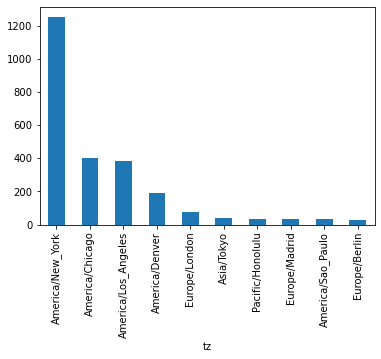

In [33]:
df2[(df2.tz != 'Missing') & (df2.tz != 'Unknown')].groupby('tz')['tz'].count().nlargest(10).plot(kind='bar')

### Q3.4,  If based on 'c' field (Country) and the 'America' keyword in 'tz' field, count how many records are from US ? (In Camino, fill in those two count numbers in format of count_by_c/count_by_tz. Don't leave any space in the answer.)

In [34]:
df2.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [35]:
#number of records in the c field with US as a tag
(df2.c == 'US').sum()

2305

In [36]:
len(df[df.c=='US'])

2305

In [41]:
df.tz.isna().sum()

120

In [42]:
len(df2[df2.tz.str.contains('America')])

2412

In [44]:
print('2305/2412')

2305/2412


### Q3.5,  Based on last question,  is both counts match ? If not, find out how many records are timezone with 'America' keyword but Country not in US? (In Camino, select the correct number)

In [43]:
df3 = df2[df2.c !='US']
len(df3[df3.tz.str.contains('America')])

143